# Weekly assignment 1, 2 & 3
### With steps dataset and survey dataset

## Introduction


## Data cleaning


In [55]:
#import all needed functions
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import math

from sklearn.linear_model import LinearRegression #all important of sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#import survey data set
survey = pd.read_csv('survey.csv')
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
#import steps data set and use other seperator sign
steps = pd.read_csv('steps.csv', sep=";")
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After importing the data sets the data sets need to be merged 


In [3]:
df = pd.merge(survey, steps, on = 'id') #'id' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# The Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 400 and under 40 a Function needs to be created that we then apply to the entire column
def above_400(x):
    if x > 400.0 or x < 40: 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_400)

In [5]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to 13-5-2014
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


In [6]:
df.iloc[:,9:]

,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df["mean"] = df.iloc[:, 9:].mean(axis=1)
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [8]:
def above_30000(x):
    if x > 30000.0: 
        return float('NaN')
    else: 
        return x
df['mean'] = df['mean'].apply(above_30000)

In [9]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


## Exploratory data analysis


In this part of the assignment we are exploraring the data 

C:\Users\ilsed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


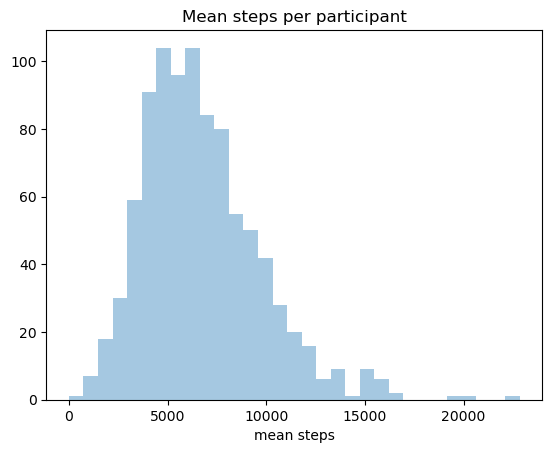

In [10]:
sns.distplot(df['mean'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Mean steps per participant')
plt.xlabel('mean steps')
plt.show()

Some things to note about this distribution:

It has 2 peaks (multimodal)
It has slightly a 'tail' on the right (right-skewed)
Because the mean is higher than the median. 

I want to take a look at the mean and median and plot them in the graph

The median steps is: 6240.073033707865 steps
The mean steps is: 6703.996351176375 steps 


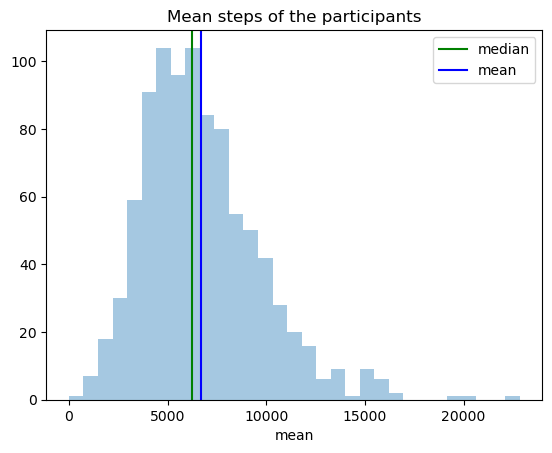

In [11]:
mean_size = df['mean'].mean()
median_size = df['mean'].median()

print(f'The median steps is: {median_size} steps')
print(f'The mean steps is: {mean_size} steps ')

sns.distplot(df['mean'].dropna(), kde=False)
plt.title('Mean steps of the participants')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because the labels are set in the previous lines
plt.show()

C:\Users\ilsed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


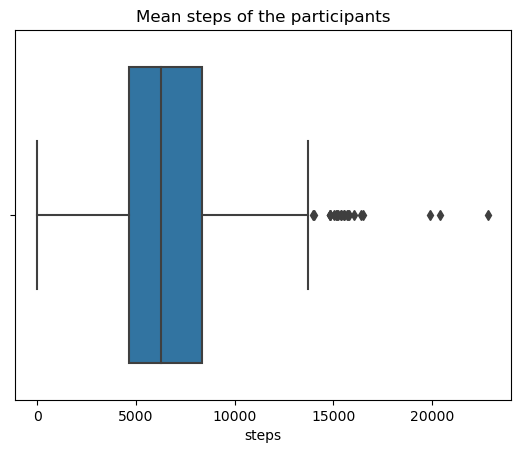

In [12]:
sns.boxplot(df['mean'])
plt.title('Mean steps of the participants')
plt.xlabel('steps')
plt.show()

In [13]:
df['mean'].describe()

count      921.000000
mean      6703.996351
std       2948.662012
min          4.000000
25%       4634.372549
50%       6240.073034
75%       8327.528037
max      22842.716846
Name: mean, dtype: float64

It looks like a quit normal distribution, and there is slightly a 'tail' on the right (right-skewed).
There are some outliers to the right.


<AxesSubplot:xlabel='age', ylabel='mean'>

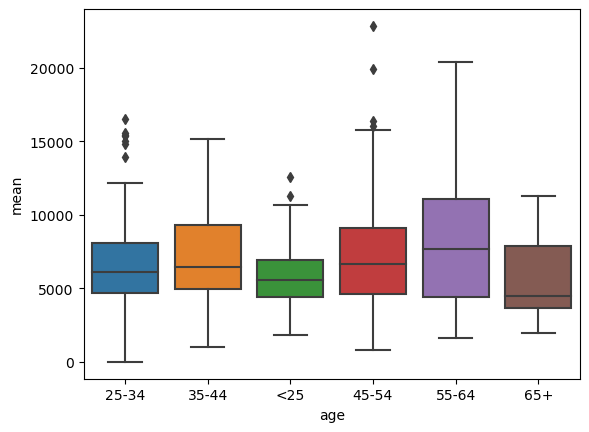

In [14]:
sns.boxplot(data=df, x="age", y="mean")

In this plot you can see that the age groups; <25, 25-34 & 45-54 have more outliers. in the agegroup 55-64 you can see there is a lot of variation in this groups and the steps variate a lot in this agegroup.  


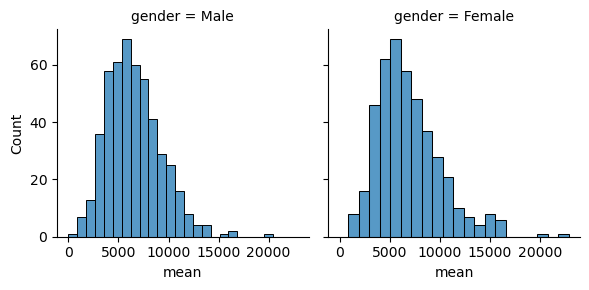

In [15]:
g = sns.FacetGrid(df, col="gender")
g.map(sns.histplot, "mean")

There is a slight diffrence, the female plot show a more right skewed curve wher the male plot is more normal devided

## Feature engineering

 A variable that gives a better indication of a healthy weight than weight alone can be the BMI. 
 You could catagorize it into the following catagories.
* 0 - 18,5 "underweight"
* 18,6 - 23 "healty"
* 23 - 27,5 "overweight"
* 27,5 and higher "obese" 
 
 For this variable you have to calculate the BMI (weight /(lenght x lenght)) length is meter.cm

In [16]:
bmiNumberHeight = ((df['height'])*2)/100 #first part of BMI calculation
bmiNumber = df['weight']/bmiNumberHeight #second part of BMI calculation
df['bmi'] = bmiNumber

def below_400(x):
    if x > 400.0 or x < 40: 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_400)

df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,bmi
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,27.528090
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,21.388889
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,23.055556
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,22.471910
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,18.263473


## Exploratory data analysis

The median bmi is: 20.38130019385212
The mean bmi is: 20.999806970675305


C:\Users\ilsed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


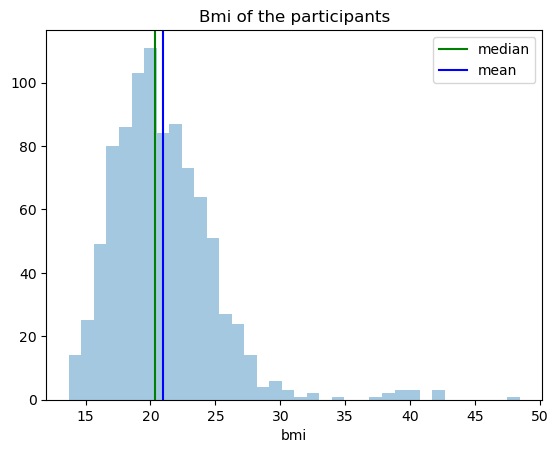

In [17]:
mean_bmi = df['bmi'].mean() 
median_bmi = df['bmi'].median()

print(f'The median bmi is: {median_bmi}')
print(f'The mean bmi is: {mean_bmi}')

sns.distplot(df['bmi'].dropna(), kde=False)
plt.title('Bmi of the participants')
plt.axvline(median_bmi, 0, 100, color='green', label='median')  
plt.axvline(mean_bmi, 0, 100, color='blue', label='mean') 
plt.legend() 
plt.show()

Some things to note about this distribution:

It has 1 peak (unimodal) It has slightly a 'tail' on the right (right-skewed) Because the mean is higher than the median. And it has some outliers to the right.

C:\Users\ilsed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


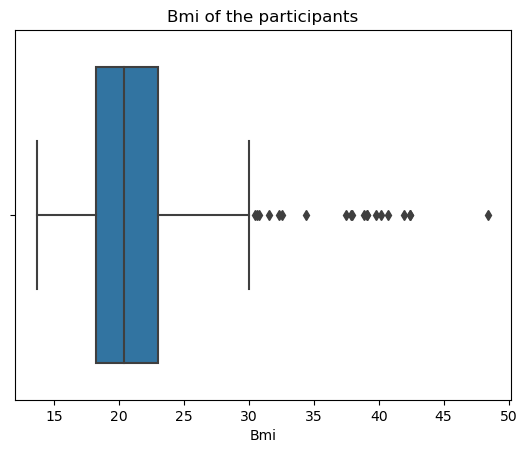

In [18]:
sns.boxplot(df['bmi'])
plt.title('Bmi of the participants')
plt.xlabel('Bmi')
plt.show()

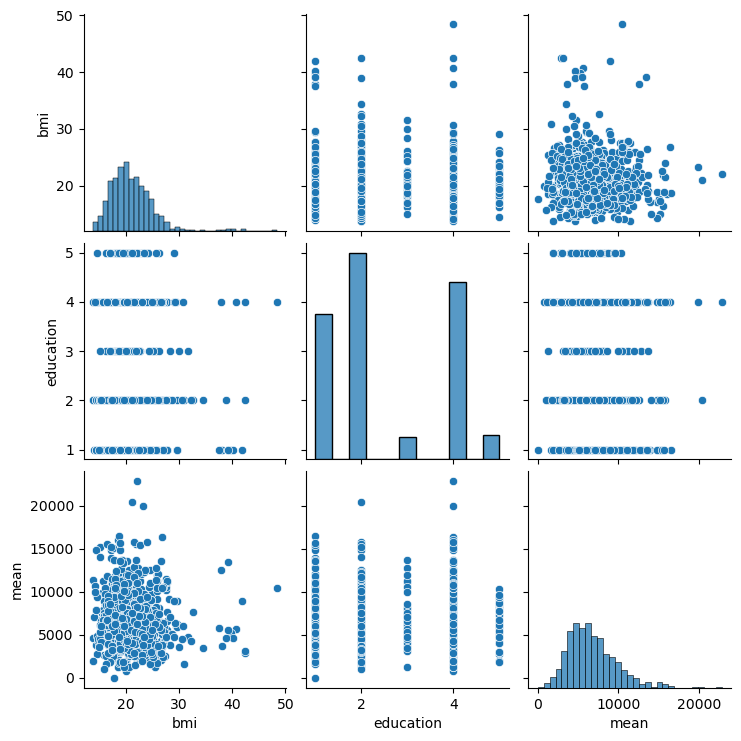

In [19]:
df2 = df[['bmi', 'education', 'mean']]
sns.pairplot(df2)
plt.show()

Some things to note about this distribution:
The diffrent variables have none to little relation to each othes 

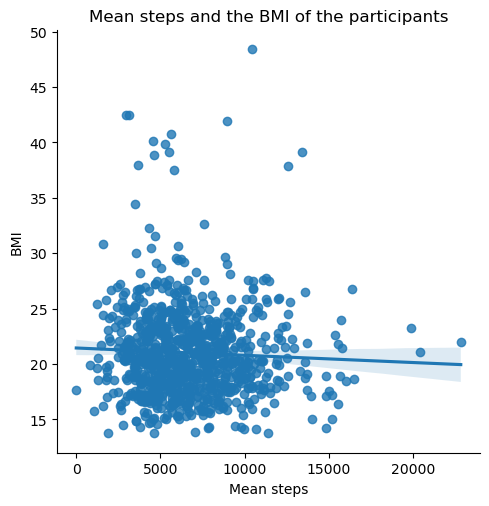

In [20]:
sns.lmplot(x='mean', y='bmi', fit_reg=True, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Mean steps') #use matplotlib to refine Seaborn plot
plt.ylabel('BMI')
plt.title('Mean steps and the BMI of the participants')
plt.show()

In [21]:
corr = df[['bmi', 'mean', 'education']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,bmi,mean,education
bmi,1.000000,-0.047178,0.016873
mean,-0.047178,1.000000,0.023946
education,0.016873,0.023946,1.000000


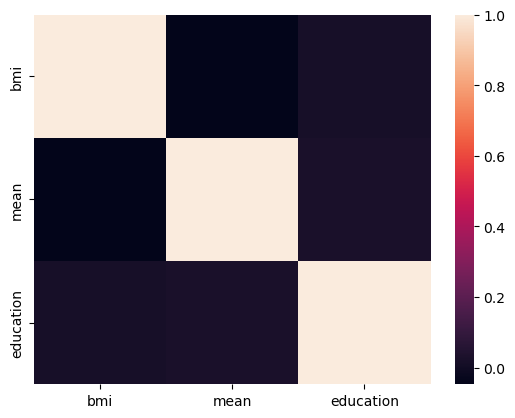

In [22]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

## Predictive model

#### Explanaition of linear regression
Linear regression is the relation between the data of (at least) two variable. It can be used as a type of predictive analysis. You can examined a set of predictor variables and look if they do a good job in predicting an outcome (dependent) variable.

In [23]:
dummies_education = pd.get_dummies(df["education_1"]) #making dummie data with the dummies function
dummies_education

,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
924,0,0,1,0,0,0
925,1,0,0,0,0,0
926,1,0,0,0,0,0
927,0,1,0,0,0,0


In [24]:
dummies_age = pd.get_dummies(df["age"]) #making dummie data with the dummies function
dummies_age

,25-34,35-44,45-54,55-64,65+,<25
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
...,...,...,...,...,...,...
924,0,0,1,0,0,0
925,0,0,0,0,0,1
926,0,1,0,0,0,0
927,0,0,0,1,0,0


In [25]:
dummies_gender = pd.get_dummies(df["gender"]) #making dummie data with the dummies function
dummies_gender

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
924,1,0
925,0,1
926,0,1
927,1,0


In [26]:
dummies_city = pd.get_dummies(df["city"]) #making dummie data with the dummies function
dummies_city

,Bordeaux,Lille,Lyon,Montpellier
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
924,0,1,0,0
925,0,1,0,0
926,0,0,0,1
927,0,1,0,0


In [27]:
df = pd.concat([df, dummies_education, dummies_age, dummies_gender, dummies_city], axis=1) #add to dataframe
df

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,45-54,55-64,65+,<25,Female,Male,Bordeaux,Lille,Lyon,Montpellier
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,0,0,0,0,0,1,1,0,0,0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,0,0,0,0,0,1,0,1,0,0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,0,0,0,0,0,1,0,0,0,1
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,0,0,0,1,0,1,0,0,1,0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,NaN,...,1,0,0,0,1,0,0,1,0,0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,NaN,...,0,0,0,1,0,1,0,1,0,0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,NaN,...,0,0,0,0,0,1,0,0,0,1
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,NaN,...,0,1,0,0,1,0,0,1,0,0


In [44]:
df = df[df['bmi'].notna()]
df = df[df['education'].notna()]
df = df[df['weight'].notna()]
df = df[df['height'].notna()]
df = df[df['mean'].notna()]

X = df[['bmi', 'Bordeaux', 'Lille', 'Lyon', 'Montpellier', 'Female', 'Male']] #to use sk-learn, we need to create lists of the two variables
y = df['mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

lm = LinearRegression() #this creates a new LR model
lm.fit(X_train, y_train) #this "fits" the model on the training data


LinearRegression()

In [52]:
y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions; store in original dataframe


## Evaluation


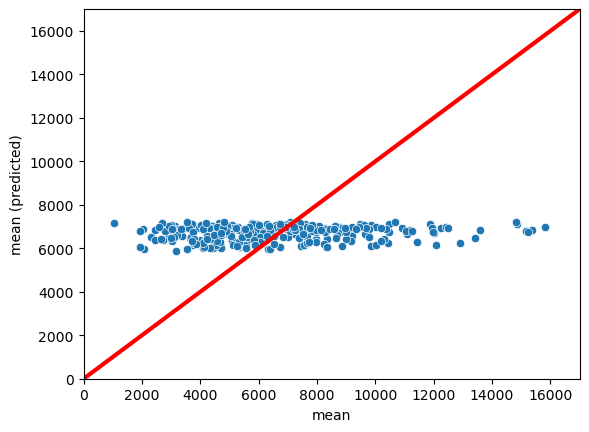

In [50]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 17000) #This sets the x-axis limits to (0,100000)
plt.ylim(0, 17000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 100000], [0, 100000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('mean')
plt.ylabel('mean (predicted)')
plt.show()

In [53]:
r2_score(y_test, y_test_p)

0.024052864535065277

In [56]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2778.9825843105123

When you look at the test and the predicted data you can see there is 
Based on the R^2, We can predict 2.05% of the mean in the citys, bmi and gender. Our prediction is off by 2779 steps. As we can see in the Y-Y' plot and the residual plot, the errors increase with mean. The model gives us not a indication. The conclusion is that this model is not accurate for this data